In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import geopandas as gpd


In [14]:
registered_voters = pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/registered_voters.csv')
voted_1= pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/nov_voters_1.csv')
voted_2= pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/nov_voters_2.csv')
voted_3= pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/nov_voters_3.csv')
census= pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/Census.csv')
harris_precincts = pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/red605_county_vtd_22g_population.csv')
del registered_voters[registered_voters.columns[0]]
del voted_1[voted_1.columns[0]]
del voted_2[voted_2.columns[0]]
del voted_3[voted_3.columns[0]]
registered_voters

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Status,Voter ID,Precinct,City,Zip,Effective Date
0,Active,1103621098,64,HOUSTON,77011,8/10/2007
1,Active,1103589060,64,HOUSTON,77011,1/1/2002
2,Active,1103644217,64,HOUSTON,77011,9/20/2003
3,Active,2194491142,64,HOUSTON,77011,9/17/2022
4,Active,1217953890,64,HOUSTON,77011,12/3/2020
...,...,...,...,...,...,...
2538166,Active,1153442468,1152,HUFFMAN,77336,7/12/2018
2538167,Active,2174265420,1152,HUFFMAN,77336,11/3/2020
2538168,Active,1119839268,1152,HUFFMAN,77336,1/1/2002
2538169,Active,1198996078,1152,HUFFMAN,77336,4/26/2021


In [15]:
registered_voters.shape

(2538171, 6)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
num_regis = registered_voters['Precinct'].value_counts(dropna=True, sort=True)

count_regis= pd.DataFrame(num_regis)
counts_regis_reset = count_regis.reset_index()
counts_regis_reset.columns = ['VTD', 'Registered People']
counts_regis_reset

,VTD,Registered People
0,126,5962
1,804,5767
2,447,5754
3,336,5616
4,352,5368
...,...,...
1096,1099,4
1097,812,1
1098,908,1
1099,989,1


In [17]:
voters12 = pd.concat([voted_1, voted_2])
all_voters = pd.concat([voters12, voted_3])


num_voted = all_voters['Voting Precinct'].value_counts(dropna=True, sort=True)

counts_voted= pd.DataFrame(num_voted)
counts_voted_reset = counts_voted.reset_index()
counts_voted_reset.columns = ['VTD', 'Voting People']

In [351]:
all_voters.shape

(1107401, 9)

In [352]:
counts_voted_reset

,VTD,Voting People
0,126,3464
1,447,3104
2,758,2990
3,619,2967
4,200,2951
...,...,...
1092,808,3
1093,1108,3
1094,1119,3
1095,1089,2


In [18]:
turnout = pd.merge(counts_regis_reset, counts_voted_reset)
turnout

,VTD,Registered People,Voting People
0,126,5962,3464
1,804,5767,2554
2,447,5754,3104
3,336,5616,2463
4,352,5368,2473
...,...,...,...
1092,1108,11,3
1093,918,7,4
1094,1057,6,1
1095,808,5,3


In [28]:
turnout['Percentage'] = turnout['Voting People'] / turnout['Registered People']*100

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Total,Unnamed: 4,Anglo,Non-Anglo,Unnamed: 7,Unnamed: 8,Asian,...,Unnamed: 13,%Anglo,%Non-Anglo,Unnamed: 16,Unnamed: 17,%Asian,%Black,%Hispanic,Unnamed: 21,%B+H
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anderson,Total:,NaN,"57,922",NaN,"33,098","24,824",NaN,NaN,543,...,NaN,57.1,42.9,NaN,NaN,0.9,21.2,19.2,NaN,39.9
2,NaN,VAP:,NaN,"47,381",NaN,"27,667","19,714",NaN,NaN,396,...,NaN,58.4,41.6,NaN,NaN,0.8,21.4,17.6,NaN,38.8
3,1,Total:,NaN,"3,153",NaN,"1,660","1,493",NaN,NaN,53,...,NaN,52.6,47.4,NaN,NaN,1.7,29.0,15.4,NaN,43.8
4,NaN,VAP:,NaN,"2,340",NaN,"1,347",993,NaN,NaN,40,...,NaN,57.6,42.4,NaN,NaN,1.7,27.0,12.1,NaN,38.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,NaN,VAP:,NaN,"1,075",NaN,149,926,NaN,NaN,4,...,NaN,13.9,86.1,NaN,NaN,0.4,0.8,85.1,NaN,85.8
20026,001a,Total:,NaN,"1,432",NaN,87,"1,345",NaN,NaN,14,...,NaN,6.1,93.9,NaN,NaN,1.0,1.5,91.8,NaN,92.5
20027,NaN,VAP:,NaN,956,NaN,69,887,NaN,NaN,11,...,NaN,7.2,92.8,NaN,NaN,1.2,1.2,91.0,NaN,91.5
20028,004a,Total:,NaN,956,NaN,54,902,NaN,NaN,1,...,NaN,5.6,94.4,NaN,NaN,0.1,1.4,93.1,NaN,93.8


In [29]:
turnout[turnout["Percentage"] == turnout["Percentage"].min()]

,VTD,Registered People,Voting People,Percentage
1067,945,110,7,6.363636


In [30]:
turnout[turnout["Percentage"] == turnout["Percentage"].max()]


,VTD,Registered People,Voting People,Percentage
1085,928,41,31,75.609756


In [24]:
shp=gpd.read_file('/content/drive/Shareddrives/BakerRipley 2023 Datathon/vtds_22g.zip')
shp1=shp.loc[shp['CNTY'] == 201]
shp1

,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
4031,201,2,0001,101,4217.0,2010001,1.309072e+06,9074.601173,"POLYGON ((1446512.978 857008.927, 1446515.965 ..."
4032,201,6,0002,101,4218.0,2010002,2.224028e+06,7248.861758,"POLYGON ((1446589.304 854684.532, 1446595.173 ..."
4033,201,1,0003,101,4219.0,2010003,1.793537e+06,6318.767104,"POLYGON ((1445337.714 857084.937, 1445332.663 ..."
4034,201,4,0004,101,4220.0,2010004,6.857116e+05,4063.372033,"POLYGON ((1445816.183 856973.140, 1445821.000 ..."
4035,201,3,0005,101,4221.0,2010005,7.634838e+05,4188.558483,"POLYGON ((1445721.505 857562.982, 1445725.036 ..."
...,...,...,...,...,...,...,...,...,...
9565,201,7,0837,101,5055.0,2010837,2.489217e+04,657.560879,"POLYGON ((1443900.379 847922.337, 1443788.133 ..."
9566,201,7,0844,101,5062.0,2010844,4.754399e+06,11916.442644,"POLYGON ((1410099.527 882003.902, 1410097.056 ..."
9567,201,5,1029,101,5247.0,2011029,3.147128e+06,15472.305257,"POLYGON ((1418748.959 855295.139, 1418756.977 ..."
9568,201,5,1053,101,5271.0,2011053,2.351467e+06,6573.046947,"POLYGON ((1433181.874 864854.588, 1433180.213 ..."


In [32]:
shpA = shp1.loc[~shp.apply(lambda row : any('A' in str(cell) for cell in row) ,axis=1)]
shpB = shpA.loc[~shpA.apply(lambda row : any('B' in str(cell) for cell in row) ,axis=1)]
shpC = shpB.loc[~shpB.apply(lambda row : any('C' in str(cell) for cell in row) ,axis=1)]
shpC
#getting rid of VTDs that include letters

,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
4031,201,2,0001,101,4217.0,2010001,1.309072e+06,9074.601173,"POLYGON ((1446512.978 857008.927, 1446515.965 ..."
4032,201,6,0002,101,4218.0,2010002,2.224028e+06,7248.861758,"POLYGON ((1446589.304 854684.532, 1446595.173 ..."
4033,201,1,0003,101,4219.0,2010003,1.793537e+06,6318.767104,"POLYGON ((1445337.714 857084.937, 1445332.663 ..."
4034,201,4,0004,101,4220.0,2010004,6.857116e+05,4063.372033,"POLYGON ((1445816.183 856973.140, 1445821.000 ..."
4035,201,3,0005,101,4221.0,2010005,7.634838e+05,4188.558483,"POLYGON ((1445721.505 857562.982, 1445725.036 ..."
...,...,...,...,...,...,...,...,...,...
9565,201,7,0837,101,5055.0,2010837,2.489217e+04,657.560879,"POLYGON ((1443900.379 847922.337, 1443788.133 ..."
9566,201,7,0844,101,5062.0,2010844,4.754399e+06,11916.442644,"POLYGON ((1410099.527 882003.902, 1410097.056 ..."
9567,201,5,1029,101,5247.0,2011029,3.147128e+06,15472.305257,"POLYGON ((1418748.959 855295.139, 1418756.977 ..."
9568,201,5,1053,101,5271.0,2011053,2.351467e+06,6573.046947,"POLYGON ((1433181.874 864854.588, 1433180.213 ..."


In [33]:
shpC['VTD'] = shpC['VTD'].astype('float')
turnout['VTD']=turnout['VTD'].astype('float')
harris=pd.merge(turnout, shpC, on=['VTD'], how='left')
harris

,VTD,Registered People,Voting People,Percentage,CNTY,COLOR,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
0,126.0,5962,3464,58.101308,201.0,2.0,101.0,4343.0,2010126,5.361823e+07,36955.149178,"POLYGON ((1412888.162 890313.774, 1412893.275 ..."
1,804.0,5767,2554,44.286457,201.0,1.0,101.0,5022.0,2010804,6.071028e+06,11605.353539,"POLYGON ((1416283.563 862027.652, 1416289.943 ..."
2,447.0,5754,3104,53.945082,201.0,3.0,101.0,4664.0,2010447,7.013513e+06,16003.610504,"POLYGON ((1464855.512 877094.796, 1464796.363 ..."
3,336.0,5616,2463,43.856838,201.0,1.0,101.0,4553.0,2010336,4.891448e+06,9939.023332,"POLYGON ((1445538.078 839007.090, 1445588.416 ..."
4,352.0,5368,2473,46.069300,201.0,2.0,101.0,4569.0,2010352,7.558572e+06,14400.078677,"POLYGON ((1472306.812 841846.643, 1472262.010 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1108.0,11,3,27.272727,201.0,2.0,101.0,5326.0,2011108,2.634536e+06,10328.354383,"POLYGON ((1480668.359 858586.373, 1480681.565 ..."
1093,918.0,7,4,57.142857,201.0,4.0,101.0,5136.0,2010918,1.363663e+05,1544.007766,"POLYGON ((1446925.471 854141.569, 1446902.360 ..."
1094,1057.0,6,1,16.666667,201.0,2.0,101.0,5275.0,2011057,6.804445e+04,1113.046035,"POLYGON ((1433585.343 884096.192, 1433573.681 ..."
1095,808.0,5,3,60.000000,201.0,7.0,101.0,5026.0,2010808,1.249405e+06,10984.960436,"POLYGON ((1485068.579 850199.058, 1485066.820 ..."


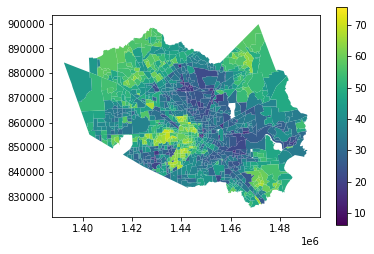

In [34]:
harris_geo=gpd.GeoDataFrame(harris)
harris_geo.plot(column='Percentage', legend=True)


In [ ]:
#transforming harris_precincts(demographics) to make it compatible for regression and to get characteristics of max and min turnout precincts

In [35]:
harris_precincts.drop(['Unnamed: 2'], axis=1, inplace=True)
harris_precincts.drop(['Unnamed: 4', 'Unnamed: 7', 'Unnamed: 13'], axis=1, inplace=True)
harris_precincts.drop(['Unnamed: 8', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 21'], axis=1, inplace=True)
harris_precincts.drop(0, axis=0, inplace=True)


In [36]:
harris_precincts = harris_precincts.truncate(before=8733)
harris_precincts

,Unnamed: 0,Unnamed: 1,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
8733,Harris,Total:,"4,731,145","1,309,593","3,421,552","392,435","981,484","2,034,709","2,967,268",27.7,72.3,8.3,20.7,43.0,62.7
8734,NaN,VAP:,"3,519,584","1,075,663","2,443,921","302,348","712,166","1,405,353","2,091,400",30.6,69.4,8.6,20.2,39.9,59.4
8735,1,Total:,"1,979","1,140",839,193,148,454,593,57.6,42.4,9.8,7.5,22.9,30.0
8736,NaN,VAP:,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3
8737,2,Total:,"4,770","2,565","2,205",472,399,"1,280","1,635",53.8,46.2,9.9,8.4,26.8,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,NaN,VAP:,"1,075",149,926,4,9,915,922,13.9,86.1,0.4,0.8,85.1,85.8
20026,001a,Total:,"1,432",87,"1,345",14,21,"1,315","1,325",6.1,93.9,1.0,1.5,91.8,92.5
20027,NaN,VAP:,956,69,887,11,11,870,875,7.2,92.8,1.2,1.2,91.0,91.5
20028,004a,Total:,956,54,902,1,13,890,897,5.6,94.4,0.1,1.4,93.1,93.8


In [37]:
harris_precincts.reset_index()
harris_precincts = harris_precincts.fillna('')
harris_precincts

,Unnamed: 0,Unnamed: 1,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
8733,Harris,Total:,"4,731,145","1,309,593","3,421,552","392,435","981,484","2,034,709","2,967,268",27.7,72.3,8.3,20.7,43.0,62.7
8734,,VAP:,"3,519,584","1,075,663","2,443,921","302,348","712,166","1,405,353","2,091,400",30.6,69.4,8.6,20.2,39.9,59.4
8735,1,Total:,"1,979","1,140",839,193,148,454,593,57.6,42.4,9.8,7.5,22.9,30.0
8736,,VAP:,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3
8737,2,Total:,"4,770","2,565","2,205",472,399,"1,280","1,635",53.8,46.2,9.9,8.4,26.8,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,,VAP:,"1,075",149,926,4,9,915,922,13.9,86.1,0.4,0.8,85.1,85.8
20026,001a,Total:,"1,432",87,"1,345",14,21,"1,315","1,325",6.1,93.9,1.0,1.5,91.8,92.5
20027,,VAP:,956,69,887,11,11,870,875,7.2,92.8,1.2,1.2,91.0,91.5
20028,004a,Total:,956,54,902,1,13,890,897,5.6,94.4,0.1,1.4,93.1,93.8


In [38]:
harris_precincts = harris_precincts.reset_index()
harris_precincts = harris_precincts.truncate(after=2335)
harris_precincts

,index,Unnamed: 0,Unnamed: 1,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
0,8733,Harris,Total:,"4,731,145","1,309,593","3,421,552","392,435","981,484","2,034,709","2,967,268",27.7,72.3,8.3,20.7,43.0,62.7
1,8734,,VAP:,"3,519,584","1,075,663","2,443,921","302,348","712,166","1,405,353","2,091,400",30.6,69.4,8.6,20.2,39.9,59.4
2,8735,1,Total:,"1,979","1,140",839,193,148,454,593,57.6,42.4,9.8,7.5,22.9,30.0
3,8736,,VAP:,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3
4,8737,2,Total:,"4,770","2,565","2,205",472,399,"1,280","1,635",53.8,46.2,9.9,8.4,26.8,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,11064,,VAP:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2332,11065,1164,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2333,11066,,VAP:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2334,11067,1165,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
harris_precincts.drop(['index'], axis=1, inplace=True)
harris_precincts

,Unnamed: 0,Unnamed: 1,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
0,Harris,Total:,"4,731,145","1,309,593","3,421,552","392,435","981,484","2,034,709","2,967,268",27.7,72.3,8.3,20.7,43.0,62.7
1,,VAP:,"3,519,584","1,075,663","2,443,921","302,348","712,166","1,405,353","2,091,400",30.6,69.4,8.6,20.2,39.9,59.4
2,1,Total:,"1,979","1,140",839,193,148,454,593,57.6,42.4,9.8,7.5,22.9,30.0
3,,VAP:,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3
4,2,Total:,"4,770","2,565","2,205",472,399,"1,280","1,635",53.8,46.2,9.9,8.4,26.8,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,,VAP:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2332,1164,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2333,,VAP:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2334,1165,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
harris_precincts.rename(columns = {'Unnamed: 0':'Precincts', 'Unnamed: 1':'Population'}, inplace = True)
total_precincts = pd.DataFrame(harris_precincts)
total_precincts

,Precincts,Population,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
0,Harris,Total:,"4,731,145","1,309,593","3,421,552","392,435","981,484","2,034,709","2,967,268",27.7,72.3,8.3,20.7,43.0,62.7
1,,VAP:,"3,519,584","1,075,663","2,443,921","302,348","712,166","1,405,353","2,091,400",30.6,69.4,8.6,20.2,39.9,59.4
2,1,Total:,"1,979","1,140",839,193,148,454,593,57.6,42.4,9.8,7.5,22.9,30.0
3,,VAP:,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3
4,2,Total:,"4,770","2,565","2,205",472,399,"1,280","1,635",53.8,46.2,9.9,8.4,26.8,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,,VAP:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2332,1164,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2333,,VAP:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2334,1165,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
total_pop = harris_precincts[harris_precincts['Population'] == 'Total:']
va_pop = harris_precincts[harris_precincts['Population'] == 'VAP:']
total_pop=total_pop.reset_index()
va_pop=va_pop.reset_index()
total_pop

,index,Precincts,Population,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
0,0,Harris,Total:,"4,731,145","1,309,593","3,421,552","392,435","981,484","2,034,709","2,967,268",27.7,72.3,8.3,20.7,43.0,62.7
1,2,1,Total:,"1,979","1,140",839,193,148,454,593,57.6,42.4,9.8,7.5,22.9,30.0
2,4,2,Total:,"4,770","2,565","2,205",472,399,"1,280","1,635",53.8,46.2,9.9,8.4,26.8,34.3
3,6,3,Total:,"4,620","3,270","1,350",317,130,814,932,70.8,29.2,6.9,2.8,17.6,20.2
4,8,4,Total:,"2,509","1,752",757,152,110,448,546,69.8,30.2,6.1,4.4,17.9,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2326,1161,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1164,2328,1162,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1165,2330,1163,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1166,2332,1164,Total:,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
va_pop['VTD']=total_pop['Precincts']
va_pop.drop(['Population'], axis=1, inplace=True)
va_pop
#we are only considering the voting age population

,index,Precincts,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H,VTD
0,1,,"3,519,584","1,075,663","2,443,921","302,348","712,166","1,405,353","2,091,400",30.6,69.4,8.6,20.2,39.9,59.4,Harris
1,3,,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3,1
2,5,,"4,232","2,391","1,841",419,329,"1,045","1,345",56.5,43.5,9.9,7.8,24.7,31.8,2
3,7,,"3,564","2,585",979,178,85,649,729,72.5,27.5,5.0,2.4,18.2,20.5,3
4,9,,"2,009","1,416",593,110,94,347,429,70.5,29.5,5.5,4.7,17.3,21.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2327,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1161
1164,2329,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1162
1165,2331,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1163
1166,2333,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1164


In [44]:
va_pop_A = va_pop.loc[~va_pop.apply(lambda row : any('A' in str(cell) for cell in row) ,axis=1)]
va_pop_a = va_pop_A.loc[~va_pop_A.apply(lambda row : any('a' in str(cell) for cell in row) ,axis=1)]
va_pop_B = va_pop_a.loc[~va_pop_a.apply(lambda row : any('B' in str(cell) for cell in row) ,axis=1)]
va_pop_b = va_pop_B.loc[~va_pop_B.apply(lambda row : any('b' in str(cell) for cell in row) ,axis=1)]
va_pop_C = va_pop_b.loc[~va_pop_b.apply(lambda row : any('C' in str(cell) for cell in row) ,axis=1)]
va_pop_C
#getting rid of VTD with letters

,index,Precincts,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H,VTD
1,3,,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3,1
2,5,,"4,232","2,391","1,841",419,329,"1,045","1,345",56.5,43.5,9.9,7.8,24.7,31.8,2
3,7,,"3,564","2,585",979,178,85,649,729,72.5,27.5,5.0,2.4,18.2,20.5,3
4,9,,"2,009","1,416",593,110,94,347,429,70.5,29.5,5.5,4.7,17.3,21.4,4
5,11,,"1,744","1,273",471,60,31,348,374,73.0,27.0,3.4,1.8,20.0,21.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2327,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1161
1164,2329,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1162
1165,2331,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1163
1166,2333,,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1164


In [47]:
va_pop_C['VTD'] = va_pop_C['VTD'].astype('float')
va_pop_C.drop(['Precincts'], axis=1, inplace=True)
va_pop_C


,index,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H,VTD
1,3,"1,644",959,685,157,118,369,482,58.3,41.7,9.5,7.2,22.4,29.3,1.0
2,5,"4,232","2,391","1,841",419,329,"1,045","1,345",56.5,43.5,9.9,7.8,24.7,31.8,2.0
3,7,"3,564","2,585",979,178,85,649,729,72.5,27.5,5.0,2.4,18.2,20.5,3.0
4,9,"2,009","1,416",593,110,94,347,429,70.5,29.5,5.5,4.7,17.3,21.4,4.0
5,11,"1,744","1,273",471,60,31,348,374,73.0,27.0,3.4,1.8,20.0,21.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2327,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0
1164,2329,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1162.0
1165,2331,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
1166,2333,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1164.0


In [48]:
demog= pd.merge(turnout, va_pop_C, on=['VTD'], how='left')
demog

,VTD,Registered People,Voting People,Percentage,index,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
0,126.0,5962,3464,58.101308,255.0,"4,656","3,239","1,417",141,158,"1,001","1,155",69.6,30.4,3.0,3.4,21.5,24.8
1,804.0,5767,2554,44.286457,1613.0,"6,764","2,093","4,671","1,068","1,102","2,439","3,508",30.9,69.1,15.8,16.3,36.1,51.9
2,447.0,5754,3104,53.945082,897.0,"4,284","1,973","2,311",222,972,"1,075","2,001",46.1,53.9,5.2,22.7,25.1,46.7
3,336.0,5616,2463,43.856838,675.0,"7,213",605,"6,608",727,"4,147","1,769","5,823",8.4,91.6,10.1,57.5,24.5,80.7
4,352.0,5368,2473,46.069300,707.0,"6,590","3,434","3,156",242,385,"2,412","2,759",52.1,47.9,3.7,5.8,36.6,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1108.0,11,3,27.272727,2221.0,464,51,413,8,303,103,394,11.0,89.0,1.7,65.3,22.2,84.9
1093,918.0,7,4,57.142857,1841.0,38,14,24,0,21,4,24,36.8,63.2,0.0,55.3,10.5,63.2
1094,1057.0,6,1,16.666667,2119.0,18,0,18,0,2,16,18,0.0,100.0,0.0,11.1,88.9,100.0
1095,808.0,5,3,60.000000,1621.0,11,5,6,0,0,3,3,45.5,54.5,0.0,0.0,27.3,27.3


In [67]:
#Finding the precincts with the max and min voter turnout

In [66]:
turnout[turnout["Percentage"] == turnout["Percentage"].min()]

,VTD,Registered People,Voting People,Percentage
1067,945.0,110,7,6.363636


In [70]:
demog.iloc[[1067]]

,VTD,Registered People,Voting People,Percentage,index,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
1067,945.0,110,7,6.363636,1895.0,212,22,190,2,5,182,187,10.4,89.6,0.9,2.4,85.8,88.2


In [64]:
turnout[turnout["Percentage"] == turnout["Percentage"].max()]

,VTD,Registered People,Voting People,Percentage
1085,928.0,41,31,75.609756


In [71]:
demog.iloc[[1085]]

,VTD,Registered People,Voting People,Percentage,index,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
1085,928.0,41,31,75.609756,1861.0,57,40,17,7,1,8,9,70.2,29.8,12.3,1.8,14.0,15.8
